# Jupyter Notebook for Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("result/accuracy/merged.csv")
df.rename(columns={'t_coffee_sp': 't-coffee_sp', 't_coffee_cs': 't-coffee_cs'}, inplace=True)

## Accuracy Matrix for BAliBASE

In [3]:
dataset = {
    'RV11_full': r'^BB11', 'RV11_homo': r'^BBS11',
    'RV12_full': r'^BB12', 'RV12_homo': r'^BBS12',
    'RV20_full': r'^BB20', 'RV20_homo': r'^BBS20',
    'RV30_full': r'^BB30', 'RV30_homo': r'^BBS30',
    'RV40_full': r'^BB40',
    'RV50_full': r'^BB50', 'RV50_homo': r'^BBS50'
}

In [4]:
cs_data = df[['ref_cs','clustalw_cs', 'muscle_cs', 't-coffee_cs']]

sp_data = df[['ref_sp','clustalw_sp', 'muscle_sp', 't-coffee_sp']]

cs_tally = {key: cs_data[df['Dataset'].str.contains(pattern)].sum()
         for key, pattern in dataset.items()}

sp_tally = {key: sp_data[df['Dataset'].str.contains(pattern)].sum()
         for key, pattern in dataset.items()}


In [5]:
def plot_hist(tally, title):
    ref_name = []
    values = {
        'ref': [],
        'clustalw': [],
        'muscle': [],
        't-coffee': []
    }
    for key, series in tally.items():
        ref_name.append(key)
        for name, value in series.items():
            values[name.split('_')[0]].append(value)
    x = np.arange(len(ref_name))
    width = 0.2
    multiplier = 0
    
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    for tool, scores in values.items():
        offset = width * multiplier
        ax.bar(x + offset, scores, width, label=tool)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x + width, ref_name, rotation=45)
    ax.legend(loc='upper left', ncols=3)

    plt.show()

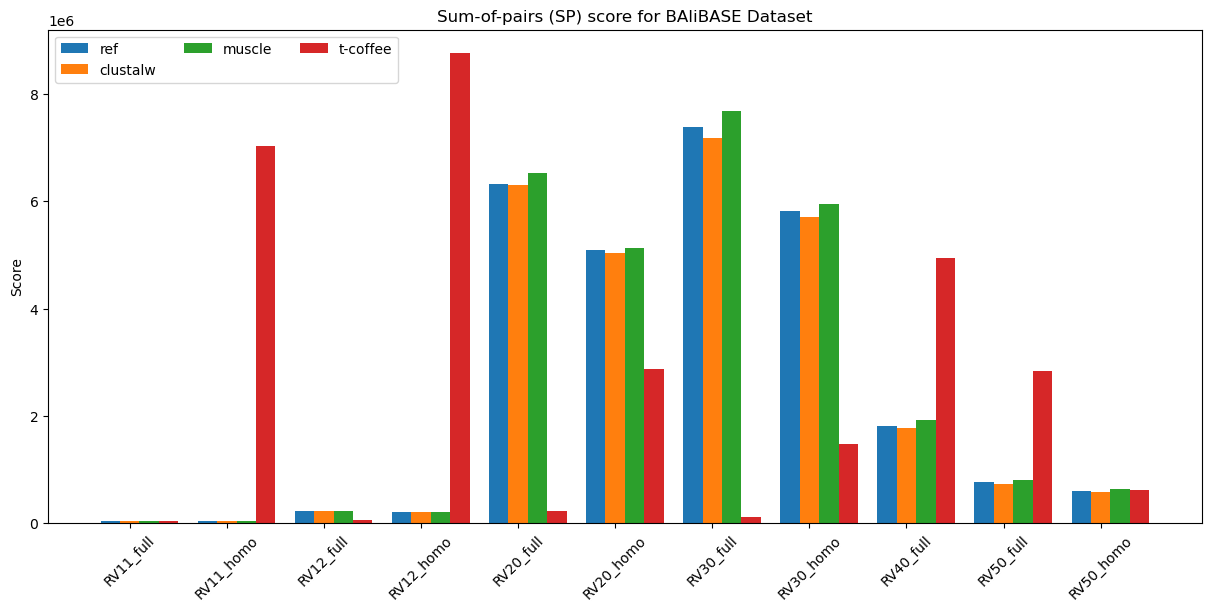

In [6]:
plot_hist(sp_tally, 'Sum-of-pairs (SP) score for BAliBASE Dataset')

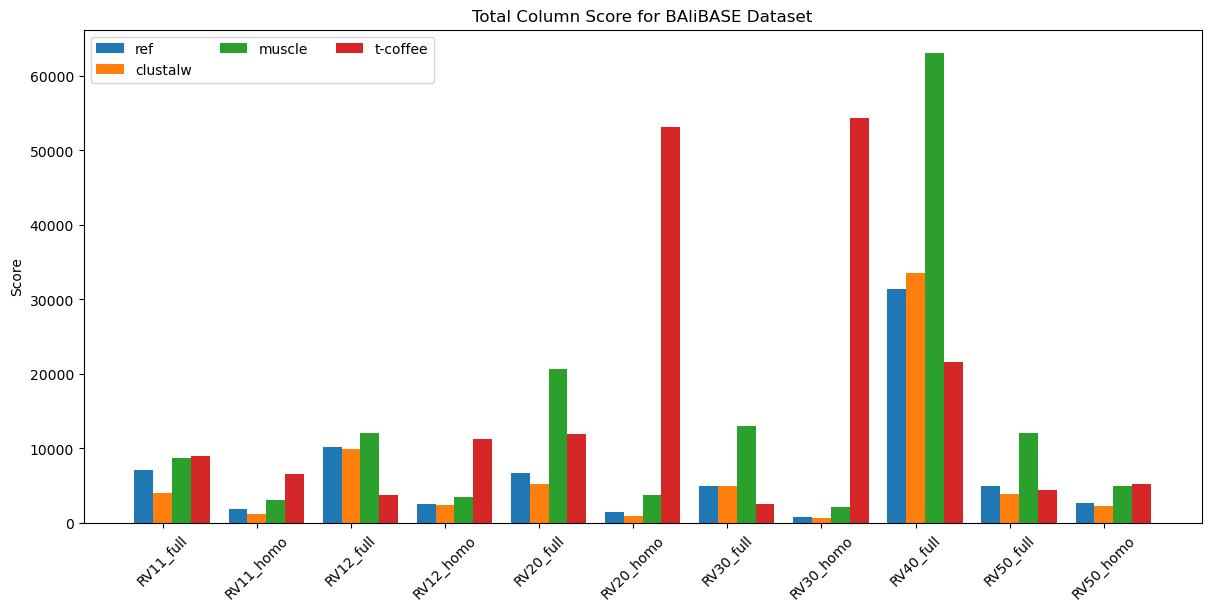

In [7]:
plot_hist(cs_tally, 'Total Column Score for BAliBASE Dataset')

## Accuracy Matrix for Covid-19

In [8]:
covid_df = df[df['Dataset'].str.contains(r'^RF')].drop(columns=['ref_sp','ref_cs'])

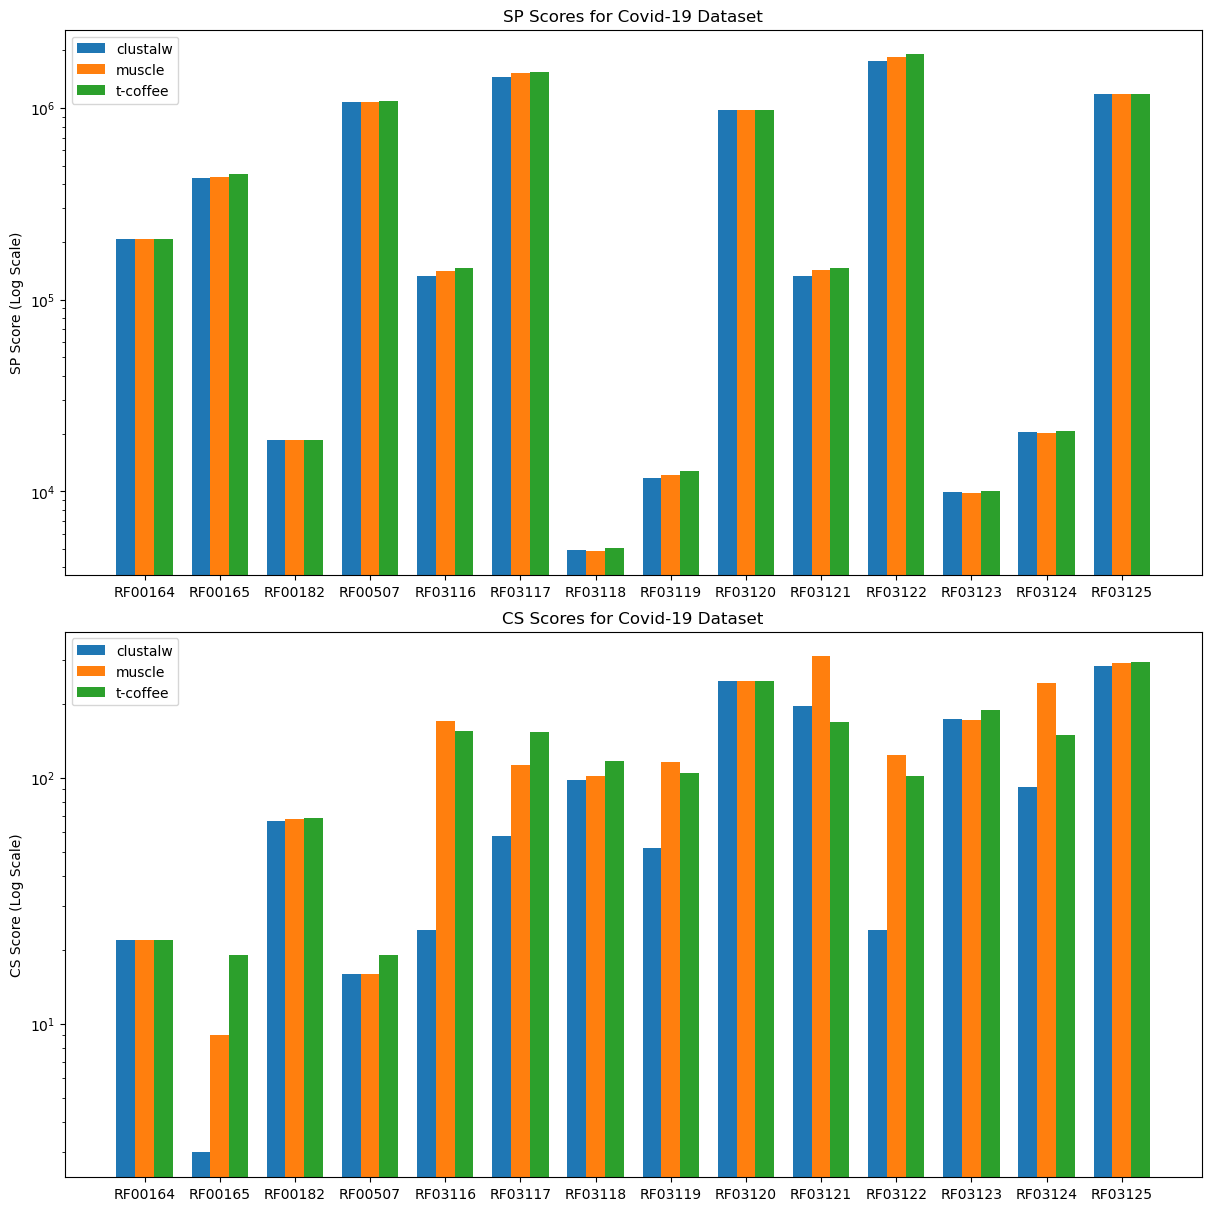

In [9]:
# Separate columns into two groups: 'sp' and 'cs'
sp_columns = ['clustalw_sp', 'muscle_sp', 't-coffee_sp']
cs_columns = ['clustalw_cs', 'muscle_cs', 't-coffee_cs']

# Extract the values for plotting
x = np.arange(len(covid_df['Dataset']))  # x positions for the bars
width = 0.25  # Width of the bars

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(12, 12), layout='constrained')

# Plot for 'sp' columns
multiplier = 0
for col in sp_columns:
    ax[0].bar(x + multiplier * width, covid_df[col], width, label=col.split('_')[0])
    multiplier += 1
ax[0].set_yscale('log')
ax[0].set_ylabel('SP Score (Log Scale)')
ax[0].set_title('SP Scores for Covid-19 Dataset')
ax[0].set_xticks(x + width)
ax[0].set_xticklabels(covid_df['Dataset'])
ax[0].legend()

# Plot for 'cs' columns
multiplier = 0
for col in cs_columns:
    ax[1].bar(x + multiplier * width, covid_df[col], width, label=col.split('_')[0])
    multiplier += 1
ax[1].set_yscale('log')
ax[1].set_ylabel('CS Score (Log Scale)')
ax[1].set_title('CS Scores for Covid-19 Dataset')
ax[1].set_xticks(x + width)
ax[1].set_xticklabels(covid_df['Dataset'])
ax[1].legend()

# Show the plots
plt.show()

## Runtime for BAliBASE

In [10]:
files = ['RV11_full.csv', 'RV11_homo.csv', 'RV12_full.csv', 'RV12_homo.csv', 'RV20_full.csv', 'RV20_homo.csv', 'RV30_full.csv', 'RV30_homo.csv', 'RV40_full.csv', 'RV50_full.csv', 'RV50_homo.csv']
ref_names = [name[:-4] for name in files]
mem_data = []
time_data = []
for csvfile in files:
    path = f'result/resources/{csvfile}'
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()
    time_tally = df[['clustalw_time', 'muscle_time', 't-coffee_time']].sum()
    mem_tally = df[['clustalw_memory', 'muscle_memory', 't-coffee_memory']].sum()
    time_data.append(time_tally)
    mem_data.append(mem_tally)

In [11]:
total_clustalw_time = 0
total_muscle_time = 0
total_t_coffee_time = 0

for entry in time_data:
    total_clustalw_time += entry["clustalw_time"]
    total_muscle_time += entry["muscle_time"]
    total_t_coffee_time += entry["t-coffee_time"]

print("ClustalW total time:", total_clustalw_time)
print("Muscle total time:", total_muscle_time)
print("T-Coffee total time:", total_t_coffee_time, '\n')

total_clustalw_mem = 0
total_muscle_mem= 0
total_t_coffee_mem = 0

for entry in mem_data:
    total_clustalw_mem += entry["clustalw_memory"]
    total_muscle_mem += entry["muscle_memory"]
    total_t_coffee_mem += entry["t-coffee_memory"]

print("ClustalW total memory:", total_clustalw_mem / 2**20)
print("Muscle total memory:", total_muscle_mem / 2**20)
print("T-Coffee total memory:", total_t_coffee_mem / 2**20)


ClustalW total time: 551.4307363033295
Muscle total time: 1390.3168003559113
T-Coffee total time: 18822.553776025772 

ClustalW total memory: 1002.5625
Muscle total memory: 76281.8671875
T-Coffee total memory: 30373.02734375


In [12]:
def plot_hist_mem(data):
    values = {
        'clustalw': [],
        'muscle': [],
        't-coffee': []
    }
    for tally in data:
        for name, value in tally.items():
            values[name.split('_')[0]].append(value / 2**20)
    x = np.arange(len(ref_names))
    width = 0.2
    multiplier = 0
    
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    for tool, scores in values.items():
        offset = width * multiplier
        ax.bar(x + offset, scores, width, label=tool)
        multiplier += 1

    ax.set_yscale('log')
    ax.set_ylabel(f'Memory (MB) (Log Scale)')
    ax.set_title("Memory Uasge for BAliBASE Dataset")
    ax.set_xticks(x + width, ref_names, rotation=45)
    ax.legend(loc='upper right', ncols=3)

    plt.show()

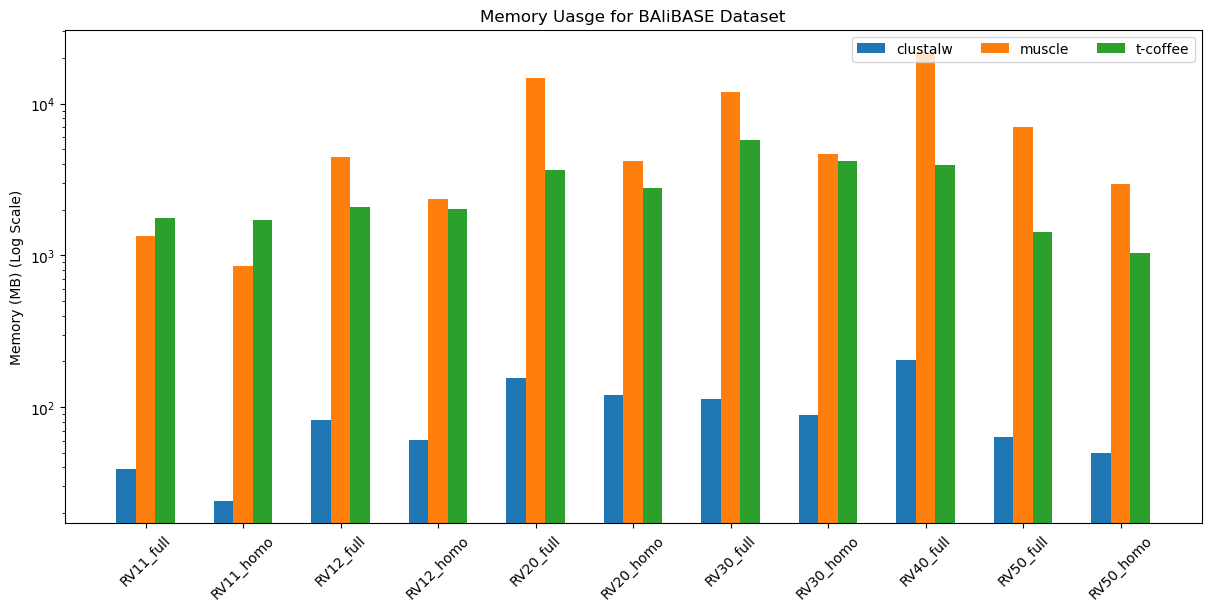

In [13]:
plot_hist_mem(mem_data)

In [14]:
def plot_hist_time(data):
    values = {
        'clustalw': [],
        'muscle': [],
        't-coffee': []
    }
    for tally in data:
        for name, value in tally.items():
            values[name.split('_')[0]].append(value)
    x = np.arange(len(ref_names))
    width = 0.2
    multiplier = 0
    
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    for tool, scores in values.items():
        offset = width * multiplier
        ax.bar(x + offset, scores, width, label=tool)
        multiplier += 1
    ax.set_yscale('log')
    ax.set_ylabel(f'Time (s) (Log Scale)')
    ax.set_title("Runtime for BAliBASE Dataset")
    ax.set_xticks(x + width, ref_names, rotation=45)
    ax.legend(loc='upper right', ncols=3)

    plt.show()

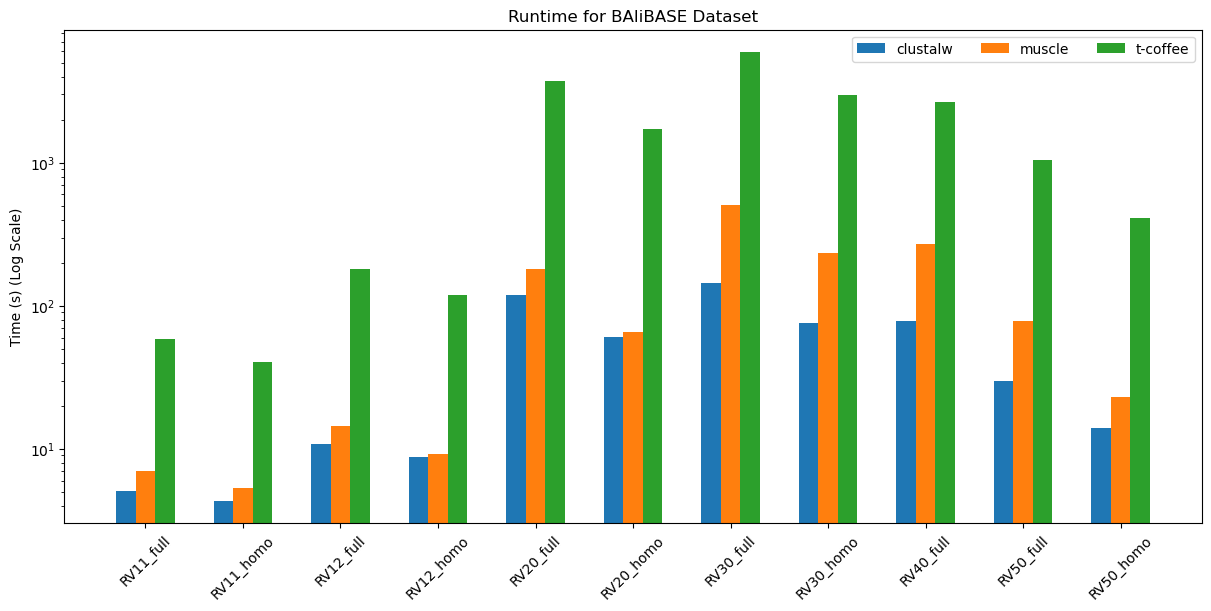

In [15]:
plot_hist_time(time_data)

In [16]:
covid_df2 = pd.read_csv("result/resources/covid-19.csv")
covid_df2.columns = covid_df2.columns.str.lower()

In [17]:
covid_mem = covid_df2[['dataset', 'clustalw_memory', 'muscle_memory', 't-coffee_memory']]
covid_time = covid_df2[['dataset', 'clustalw_time', 'muscle_time', 't-coffee_time']]

In [18]:
print(covid_time.drop(columns=['dataset']).sum())
print(covid_mem.drop(columns=['dataset']).sum() / 2**20)

clustalw_time      27.203246
muscle_time        24.541705
t-coffee_time    1073.082391
dtype: float64
clustalw_memory      36.351562
muscle_memory      1341.644531
t-coffee_memory    1595.410156
dtype: float64


In [19]:
def plot_bar_covid_mem(df):
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    width = 0.2
    x = range(len(df['dataset']))
    ax.bar(x, df['clustalw_memory'] / 2**20, width, label='ClustalW')
    ax.bar([p + width for p in x], df['muscle_memory'] / 2**20, width, label='MUSCLE')
    ax.bar([p + 2 * width for p in x], df['t-coffee_memory'] / 2**20, width, label='T-Coffee')

    # Labels and Title
    ax.set_xticks([p + width for p in x])
    x_label = [name[:-3] for name in df['dataset']]
    ax.set_yscale('log')
    ax.set_xticklabels(x_label, rotation=45, ha='right')
    ax.set_ylabel('Memory (MB) (Log Scale)')
    ax.set_title('Memory Usage for Covid-19 Dataset')
    ax.legend()

    # Show Plot
    plt.show()

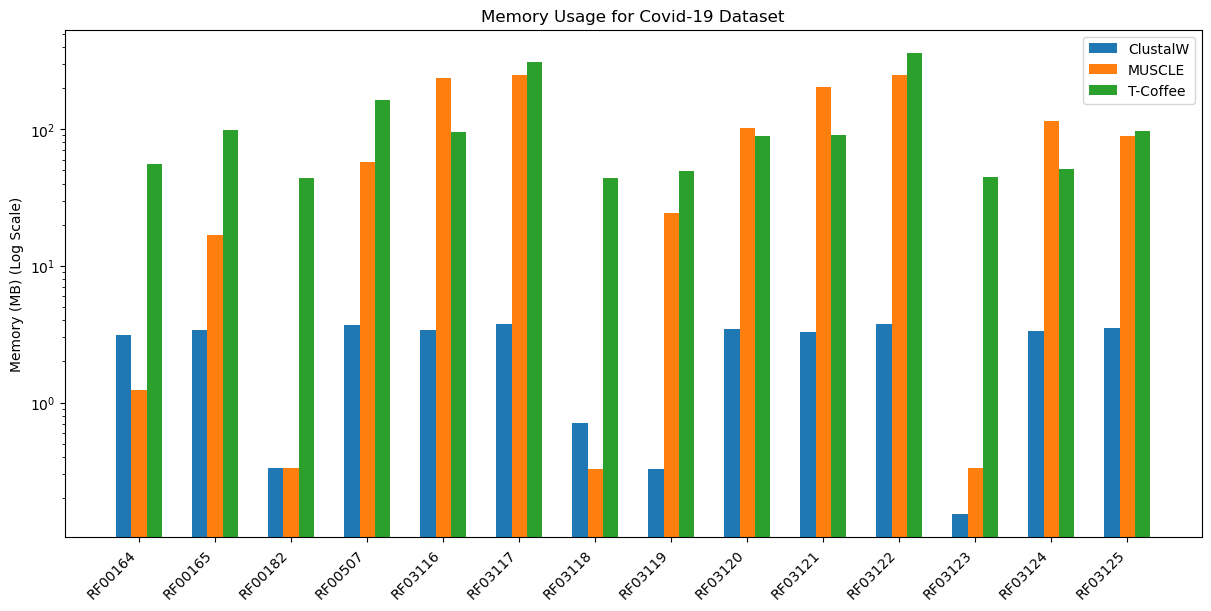

In [20]:
plot_bar_covid_mem(covid_mem)

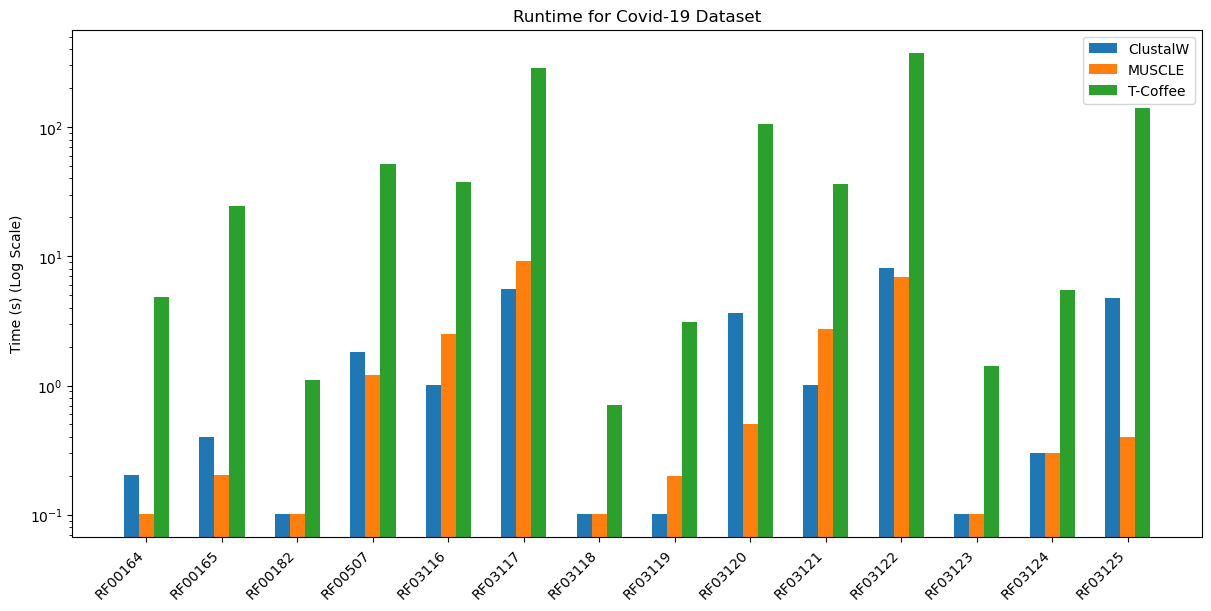

In [21]:
def plot_bar_covid_time(df):
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    x = range(len(df['dataset']))
    width = 0.2

    ax.bar(x, df['clustalw_time'], width, label='ClustalW')
    ax.bar([p + width for p in x], df['muscle_time'], width, label='MUSCLE')
    ax.bar([p + 2 * width for p in x], df['t-coffee_time'], width, label='T-Coffee')

    # Labels and Title
    ax.set_xticks([p + width for p in x])
    x_label = [name[:-3] for name in df['dataset']]
    ax.set_yscale('log')
    ax.set_xticklabels(x_label, rotation=45, ha='right')
    ax.set_ylabel('Time (s) (Log Scale)')
    ax.set_title('Runtime for Covid-19 Dataset')
    ax.legend()

    # Show Plot
    plt.show()

plot_bar_covid_time(covid_time)